<a href="https://colab.research.google.com/github/michalis0/DataScience_and_MachineLearning/blob/master/07-api/Week_07_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to APIs

In this lab, we will explore **Application Programming Interfaces (APIs)** and understand how they allow different software applications to communicate. 
APIs play a crucial role in today's technology landscape, enabling data sharing and functionality extension across systems.

<img src='https://images.ctfassets.net/vwq10xzbe6iz/5sBH4Agl614xM7exeLsTo7/9e84dce01735f155911e611c42c9793f/rest-api.png' width="450">

### What is an API?

An **API (Application Programming Interface)** is a set of rules that allows one software program to interact with another. APIs define the kinds of requests 
that can be made, how to make them, and the data formats that should be used.

**Real-life Analogy**: Think of an API as a waiter in a restaurant. You (the client) tell the waiter (API) your order, 
and they deliver your request to the kitchen (server) and bring back your meal (response).




### Why Use APIs?

APIs allow us to:
- Access data or functionality from other applications without needing to understand their internal workings.
- Enhance application features by integrating external services (e.g., payment gateways, social media).
- Allow for modular, scalable, and efficient development.


### Types of APIs and HTTP Methods

APIs often communicate using HTTP methods. Here are some common ones:

- **GET**: Requests data from a server (e.g., retrieve weather data).
- **POST**: Sends new data to the server (e.g., submit form data).
- **PUT** / **PATCH**: Updates data on the server (e.g., edit a user profile).
- **DELETE**: Deletes data from the server (e.g., remove a record).


### Real-World Examples of API Use

1. **Weather Applications**: Use APIs to fetch real-time weather data.
2. **Social Media**: Posting content, retrieving data like posts and likes.
3. **Payment Processing**: Allow secure transactions through APIs like PayPal or Stripe.
4. **Geolocation Services**: Get maps and directions through APIs like Google Maps.
"""

### API Structure and Parameters

To interact with an API, you typically need to know its **endpoint** (URL) and possibly some **parameters**. Here are the components:

1. **Endpoint**: The URL where the API is accessible (e.g., `https://api.openweathermap.org/data/2.5/weather`). 
2. **Headers**: Metadata about the request, like content type.
3. **Parameters**: Additional data sent to the API, such as `location` for weather APIs or `language` for translation APIs.

Below, we will explore how to use these components in a practical setting.

# 2. Implementation

In [20]:
# Install necessary libraries
# (Requests is usually pre-installed, but uncomment if needed)
# !pip install requests

# Import the requests library for making API calls
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt
from datetime import datetime


In this section, we will make requests to several free APIs to retrieve data.

### Example 1: Coin Cap API

This code snippet demonstrates how to use the **CoinCap API** to retrieve real-time market information for Bitcoin. By making a simple HTTP `GET` request to the CoinCap API, we can access essential details like Bitcoin's name, symbol, current price in USD, market capitalization, and total supply. 

This information is especially useful for monitoring cryptocurrency trends, performing financial analyses, or integrating real-time data into applications. Below is the code to achieve this, along with a link to the [CoinCap API Documentation](https://docs.coincap.io/) for further reference.

In [21]:

# Define the URL for Bitcoin data
url = "https://api.coincap.io/v2/assets/bitcoin"

# Make the GET request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()['data']
    # Display Bitcoin's market information
    print("Name:", data['name'])
    print("Symbol:", data['symbol'])
    print("Price (USD):", data['priceUsd'])
    print("Market Cap (USD):", data['marketCapUsd'])
    print("Supply:", data['supply'])
else:
    print("Failed to retrieve data:", response.status_code)


Name: Bitcoin
Symbol: BTC
Price (USD): 68863.2815004285602906
Market Cap (USD): 1361717747174.6859458981486226
Supply: 19774221.0000000000000000


This code uses the **CoinCap API** with the `/history` endpoint to retrieve daily historical prices for Bitcoin over a specified date range. 

By adding parameters for the interval (`d1` for daily) and start and end dates, the script requests data, checks for success, and displays the date and USD price for the first 10 entries. 

Dates are converted from timestamps to a readable format, providing a quick view of Bitcoin’s price trends over time.

In [23]:
import requests
from datetime import datetime

# Define the URL for historical data of Bitcoin
url = "https://api.coincap.io/v2/assets/bitcoin/history"

# Set the parameters for a specific date range and interval
params = {
    "interval": "d1",  # daily data
    "start": int(datetime(2023, 1, 1).timestamp() * 1000),  # Start date in milliseconds (e.g., 2023-01-01)
    "end": int(datetime(2023, 12, 31).timestamp() * 1000)   # End date in milliseconds (e.g., 2023-12-31)
}

# Make the GET request
response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()['data']
    # Displaying some historical price data
    print("Date\t\tPrice (USD)")
    print("-" * 30)
    for entry in data[:10]:  # Limiting output to the first 10 entries
        date = datetime.fromtimestamp(entry['time'] / 1000).strftime('%Y-%m-%d')
        price = float(entry['priceUsd'])
        print(f"{date}\t${price:,.2f}")
else:
    print("Failed to retrieve data:", response.status_code)


Date		Price (USD)
------------------------------
2023-01-02	$16,708.52
2023-01-03	$16,682.71
2023-01-04	$16,822.19
2023-01-05	$16,826.73
2023-01-06	$16,821.14
2023-01-07	$16,940.31
2023-01-08	$16,946.46
2023-01-09	$17,235.64
2023-01-10	$17,290.62
2023-01-11	$17,450.38


Now, let's add a graph to visualize the historical Bitcoin price data more effectively. 

This time series graph shows Bitcoin’s daily price movements, making trends over the specified period easier to interpret. Labels, a title, a legend, and gridlines enhance the readability of the visualization.

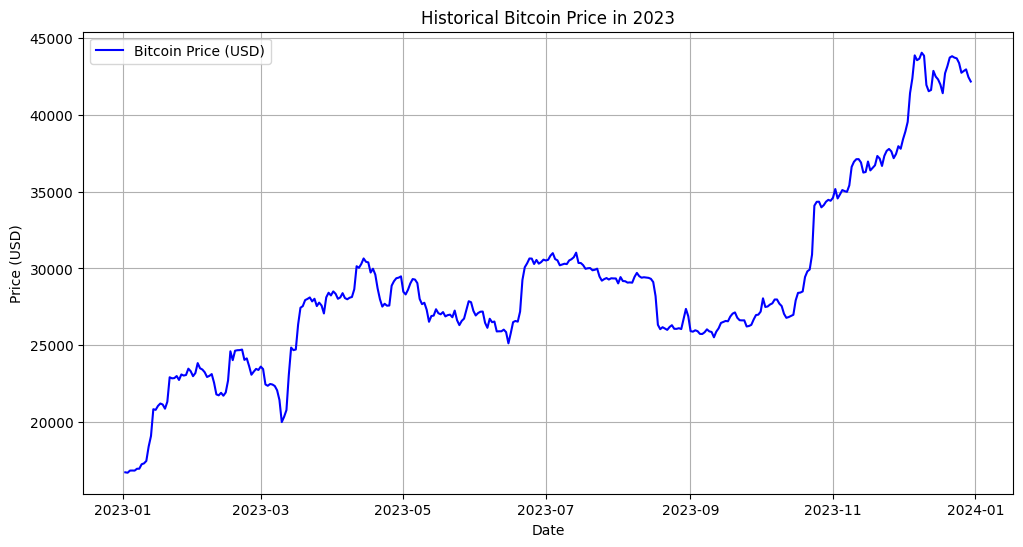

In [24]:


# Check if the request was successful
data = response.json()['data']

# Extract dates and prices
dates = [datetime.fromtimestamp(entry['time'] / 1000) for entry in data]
prices = [float(entry['priceUsd']) for entry in data]

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(dates, prices, label='Bitcoin Price (USD)', color='blue')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Historical Bitcoin Price in 2023')
plt.legend()
plt.grid(True)
plt.show()


## Your Turn !

### Exercise: Exploring the PotterAPI for Harry Potter Data

In this exercise, you’ll use the **PotterAPI**, an API that provides data related to the Harry Potter universe, to retrieve a list of books. Using this data, you’ll practice making API calls and converting the response into a format that allows for easy analysis.

**API Documentation**: For more information on available endpoints and how to use the API, refer to the [PotterAPI GitHub Documentation](https://github.com/fedeperin/potterapi).

#### Instructions
1. Explore the PotterAPI documentation to find the endpoint for retrieving book data.
2. Write a function that makes a `GET` request to this endpoint and returns the data in JSON format.
3. Use pandas to load the data from the API directly into a DataFrame, then display it to review the list of Harry Potter books and any other details available.

In [38]:
# Your code here
dataframe_harry_poter = pd.read_json('https://potterapi-fedeperin.vercel.app/en/books')
display(dataframe_harry_poter)

,number,title,originalTitle,releaseDate,description,pages,cover,index
0,1,Harry Potter and the Sorcerer's Stone,Harry Potter and the Sorcerer's Stone,"Jun 26, 1997","On his birthday, Harry Potter discovers that h...",223,https://raw.githubusercontent.com/fedeperin/po...,0
1,2,Harry Potter and the chamber of secrets,Harry Potter and the chamber of secrets,"Jul 2, 1998",Harry Potter and the sophomores investigate a ...,251,https://raw.githubusercontent.com/fedeperin/po...,1
2,3,Harry Potter and the Prisoner of Azkaban,Harry Potter and the Prisoner of Azkaban,"Jul 8, 1999",Harry's third year of studies at Hogwarts is t...,317,https://raw.githubusercontent.com/fedeperin/po...,2
3,4,Harry Potter and the Goblet of Fire,Harry Potter and the Goblet of Fire,"Jul 8, 2000",Hogwarts prepares for the Triwizard Tournament...,636,https://raw.githubusercontent.com/fedeperin/po...,3
4,5,Harry Potter and the Order of the Phoenix,Harry Potter and the Order of the Phoenix,"Jun 21, 2003","In his fifth year at Hogwarts, Harry discovers...",766,https://raw.githubusercontent.com/fedeperin/po...,4
5,6,Harry Potter and the Half-Blood Prince,Harry Potter and the Half-Blood Prince,"Jul 16, 2005","Harry discovers a powerful book and, while try...",607,https://raw.githubusercontent.com/fedeperin/po...,5
6,7,Harry Potter and the Deathly Hallows,Harry Potter and the Deathly Hallows,"Jul 21, 2007","Harry, Ron and Hermione go on a dangerous miss...",607,https://raw.githubusercontent.com/fedeperin/po...,6
7,8,Harry Potter and the Cursed Child,Harry Potter and the Cursed Child,"Jul 30, 2016","Harry's second son entered Hogwarts, but in Sl...",336,https://raw.githubusercontent.com/fedeperin/po...,7


# 3. Configure Wi-Fi on m5stack


To configure Wi-Fi on the M5Stack, follow these steps carefully:

1. **Turn on the M5Stack** and press the **“Setup”** button.
2. Select **“Config Wi-Fi by Web”** and then tap **“Start”**.

   This will launch the M5Stack into Wi-Fi configuration mode. On the screen, you will see the SSID (network name) of a Wi-Fi network, such as **M5-FB9C**.

3. **Connect to the M5Stack Wi-Fi network** from your computer:
   - Open your computer’s Wi-Fi settings.
   - Find the SSID displayed on the M5Stack screen (e.g., **M5-FB9C**) and connect to it.

4. **Open a Web Browser**:
   - Enter the **IP address** shown on the M5Stack screen into the browser's address bar.
   - This will open a configuration page.

5. **Enter Your Wi-Fi Credentials**:
   - On the configuration page, enter the **SSID** and **password** of the Wi-Fi network you want the M5Stack to connect to (e.g., your home Wi-Fi or mobile hotspot).
   - Once you save the settings, the M5Stack will restart and automatically connect to the newly configured Wi-Fi.


#### Reconfiguring for UNIL’s Wi-Fi Network

If you need to set up the device to connect to the UNIL IoT Wi-Fi, use the following details:

- **SSID**: `iot-unil`
- **Password**: `4u6uch4hpY9pJ2f9`

By following these steps, you can seamlessly configure the M5Stack to connect to your desired Wi-Fi network.